In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [10]:
df = pd.read_csv('../data/private/csv/fam/september.csv')
df.head()

,time,sysclass,lat,lon,dir,vel,size,ttyyyxx1,ttyyyxx2,ttyyyxx3,...,maxz,meanvil,ttvil,meanprec,maxprec,year,month,day,hour,minute
0,0.0,0.0,-2.33,-58.99,-999.0,0.0,14.0,0.0,0.0,0.0,...,36.23,0.99,13.87,4.86,14.52,2014,9,1,16,12
1,0.2,1.0,-2.31,-59.05,288.0,35.1,32.0,0.0,0.0,0.0,...,37.55,0.61,19.43,4.39,17.88,2014,9,1,16,12
2,0.4,1.0,-2.29,-59.11,288.0,35.1,15.0,0.0,0.0,0.0,...,23.01,0.20,2.96,1.07,1.85,2014,9,1,16,12
3,0.0,0.0,-3.61,-58.47,288.0,35.1,25.0,0.0,0.0,0.0,...,38.73,1.10,27.55,6.33,21.64,2014,9,1,16,24
4,0.2,1.0,-3.61,-58.49,270.0,11.1,50.0,0.0,0.0,0.0,...,37.37,0.53,26.40,2.77,17.36,2014,9,1,16,24


In [11]:
df.columns

Index(['time', 'sysclass', 'lat', 'lon', 'dir', 'vel', 'size', 'ttyyyxx1',
       'ttyyyxx2', 'ttyyyxx3', 'ttyyyxx4', 'ttyyyxx5', 'riverfrac', 'convfrac',
       'strafrac', 'meanz', 'maxz', 'meanvil', 'ttvil', 'meanprec', 'maxprec',
       'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [17]:
r = df[df['maxz'] < 45][['maxz', 'ttyyyxx3', 'convfrac', 'strafrac']]

In [18]:
c = df['convfrac'].values.ravel()
s = df['strafrac'].values.ravel()

In [76]:
z = df[['maxz']]
l = df[['ttyyyxx3']]

X_train, X_test, y_train, y_test = train_test_split(z, l, test_size=.2)

clf = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)

In [77]:
y_pred = clf.predict(X_test)

/home/adriano/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


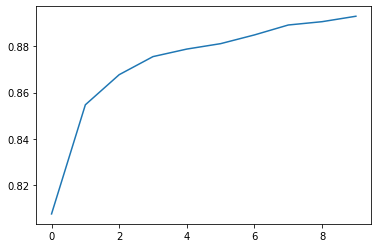

In [78]:
score = cross_val_score(clf, z, l, cv=10)
plt.plot(score)

Accuracy: 0.8676898650436623


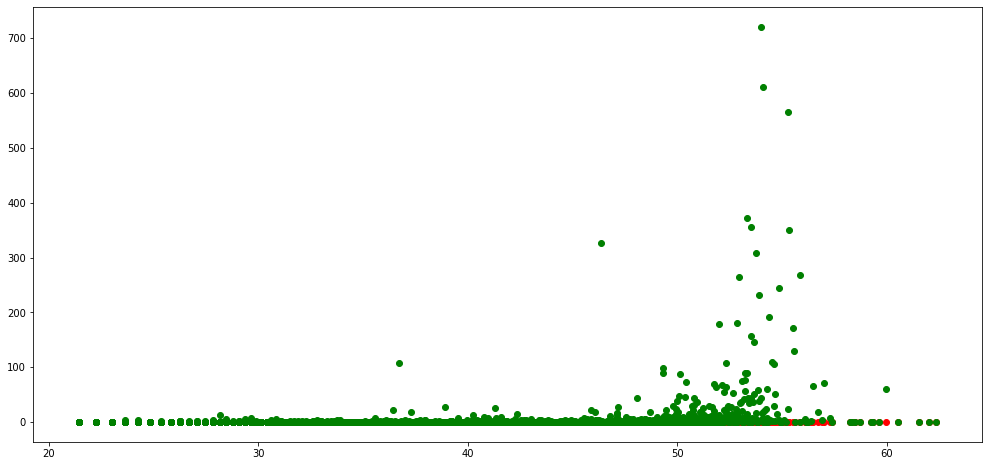

In [79]:
plt.figure(figsize=(17, 8))
plt.scatter(X_test, y_pred, color='red')
plt.scatter(X_test, y_test, color='green')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

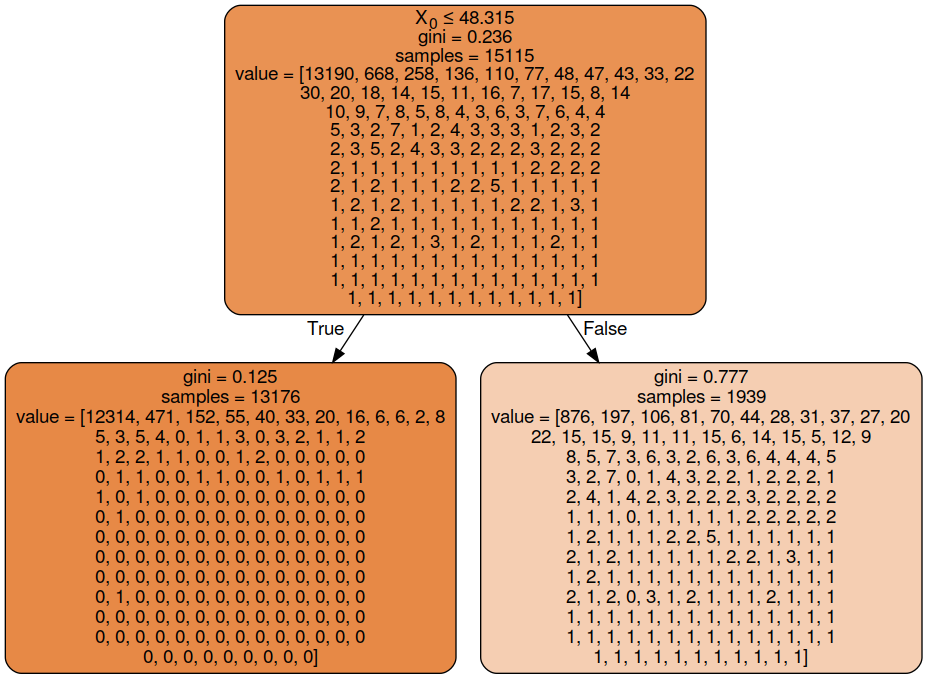

In [80]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()






















(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [75]:
export_graphviz(clf, out_file='treeModel.dot', feature_names=['maxz'])